# UNIVERSITY OF CALGARY | ENGG 200
## Week 2: Working with Data in Python

Being able to work with a wide variety of data is critical to an engineer's role.  Microsoft Excel is an easy to use solution, and is frequently a good place to start, but Python provides more flexibilty, both for types of data as well as for data sizes.

### Objectives
* Read and process .csv files
* Use loops and conditionals to extract portions of the data
* Plot the data using `matplotlib`

### Data
In this worksheet, we will be exploring energy consumption data over three years for two buildings on the University of Calgary campus.  Data includes the following columns:
- Heating Use (kWh)
- Cooling Use (kWh)
- Electricity Use (kWh)
- Natural Gas Use (kWh)
- Water Use ($m^3$)

IMPORTANT: the data is contained in two files, `bulding1.csv` and `building2.csv`.  Be sure that this python notebook file and the two `.csv` files are in the same folder.

### Questions

We would like to answer to following questions:
1. Are there weekly, season and yearly trends in the data?  Do they make sense?
2. How did the campus shutdown in March 2020 affect energy use?
3. Compare the energy use of the two buildings.  How are they different?

## Task 1: Hypothesis
Before diving into the data, it is important to first hypothesize what you think the answers will be.  In the space below, write your hypothesis for the first two questions above.

1.
When the heating and cooling is looked at there will be an evident inverse relationship between them that follows a predictable annual pattern due to cooling being used in the summer while heat in the winter.
When looking at electricity there may be evidence of weekly rise and drops as there will be high weekday usage but lower Saturday and Sunday usage. It will also drop during the spring/summer semesters due to less people present.
Natural gas will probably be constant as it can be used for heating and cooling. So, regardless of the time of year it will be in high demand.
Water usage will be very similar to electricty in terms of drops on weekends and the spring/summer due to less poeple present.

2.
The campus shutdown will slightly lower both heating and cooling as it will be less important for a building to be kept at a specific temperature but rather are range when there is not people.
The electricity weekly rises will disapear and it will reflect more of a weekend/spring-summer energy usage.
Natural gas will have a drop due to less resources being demanded upon and consume.
Water will be similar to electricity with is constantly reflecting more of a weekend/spring-summer usage.

## Task 2: Import the Data
The data we will be using is contained in two `.csv` files.  We will import the data in three ways:
- using the `csv` library
- using the `numpy` library
- using the `pandas` library

Note, `pandas` may not be installed by default on your computer.

### Using `csv`
**Step 1**: Load the necessary libraries: Python has a built-in `csv` library that is able to read and interpret csv files.  As a reminder, csv stands for comma separated values.

Let's read the first 5 lines of the csv file:

In [1]:
# load the csv library
import csv

# 'r' is read only
# 'w' is overwrite
# 'a' is append

with open('building1.csv', 'r') as file:
    reader = csv.reader(file)
    
    # let's read the first 5 lines
    counter = 0
    for row in reader:
        print(row)
        counter = counter = counter + 1
        if counter > 5:
            break

['Date', 'Heating (kWh)', 'Cooling (kWh)', 'Electricity (kWh)', 'Nat Gas (kWh)', 'Domestic Water (m3)']
['10/1/2018', '16244.46', '4920.66', '13240.1', '1319.45', '6.39']
['10/2/2018', '17772.24', '4882.56', '13108.56', '1413.89', '49.96']
['10/3/2018', '16852.79', '5163.91', '13307.63', '1288.89', '101.98']
['10/4/2018', '15450.01', '5117.02', '12917.94', '1422.22', '110.85']
['10/5/2018', '13422.23', '5225.46', '10770.25', '1413.89', '106.5']


**Step 2**: We want to import each column as a separate variable.  Let's do this for the first 5 rows again.

Note: `csv` reads all values as strings, not as floats (numbers).  We need to use `float()` to convert to a number, but as this may fail, it is useful to use a `try:` `except:` block.

In [2]:
time = []  # empty array called time
heating = [] # empty array called heating


with open('building1.csv', 'r') as file:
    reader = csv.reader(file)
    
    # let's read the first 5 lines
    counter = 0
    for row in reader:
        try:
            time.append(row[0])
            heating.append(float(row[1]))

        except:
            print('Row value conversion error')
        counter = counter = counter + 1
        if counter > 5:
            break
            
print(time)
print(heating)

Row value conversion error
['Date', '10/1/2018', '10/2/2018', '10/3/2018', '10/4/2018', '10/5/2018']
[16244.46, 17772.24, 16852.79, 15450.01, 13422.23]


This seems clunky, but there are other ways of importing that `csv` file.  

### Using `numpy`

**Alternative 1**: Use `numpy`.  `numpy` is a numerical library with a lot of built in functionality.  One function is to generate numpy arrays from text:

In [3]:
import numpy

data = numpy.genfromtxt('building1.csv', delimiter=",", encoding=None)
data

array([[         nan,          nan,          nan,          nan,
                 nan,          nan],
       [         nan, 1.624446e+04, 4.920660e+03, 1.324010e+04,
        1.319450e+03, 6.390000e+00],
       [         nan, 1.777224e+04, 4.882560e+03, 1.310856e+04,
        1.413890e+03, 4.996000e+01],
       ...,
       [         nan, 8.060030e+03, 3.833820e+03, 1.125303e+04,
        5.587430e+03, 1.278000e+01],
       [         nan, 9.048610e+03, 7.064980e+03, 1.160406e+04,
        5.607750e+03, 1.466000e+01],
       [         nan, 6.312820e+03, 8.190850e+03, 1.051837e+04,
        5.584340e+03, 3.450000e+00]])

As we can see, all the numbers are imported, but column names and dates are not by default.  

To get the data value in the 3rd row and 4th column, we use:

In [4]:
data[2,3]

13108.56

To get the entire 3rd row, we can use:

In [5]:
data[2,:]

array([     nan, 17772.24,  4882.56, 13108.56,  1413.89,    49.96])

The problem here is that non-numerical numbers are imported as `nan`, including the time column.

### Using `pandas`

**Alternative 2**: Use `pandas`.  `pandas` is a data importing and management library, among other things.  It makes importing csv files very easy:

In [6]:
import pandas

data = pandas.read_csv('building1.csv', sep=',', header=0)
data.head()

,Date,Heating (kWh),Cooling (kWh),Electricity (kWh),Nat Gas (kWh),Domestic Water (m3)
0,10/1/2018,16244.46,4920.66,13240.10,1319.45,6.39
1,10/2/2018,17772.24,4882.56,13108.56,1413.89,49.96
2,10/3/2018,16852.79,5163.91,13307.63,1288.89,101.98
3,10/4/2018,15450.01,5117.02,12917.94,1422.22,110.85
4,10/5/2018,13422.23,5225.46,10770.25,1413.89,106.50


We still need to convert the time column to the `datetime` datatype.  Note, this will take some time.

In [7]:
data['Date'] = pandas.to_datetime(data['Date'])

To print the first 5 rows of data, we can use the `head()` command.  `tail()` prints the last 5 rows of data.

In [8]:
data.head()

,Date,Heating (kWh),Cooling (kWh),Electricity (kWh),Nat Gas (kWh),Domestic Water (m3)
0,2018-10-01,16244.46,4920.66,13240.10,1319.45,6.39
1,2018-10-02,17772.24,4882.56,13108.56,1413.89,49.96
2,2018-10-03,16852.79,5163.91,13307.63,1288.89,101.98
3,2018-10-04,15450.01,5117.02,12917.94,1422.22,110.85
4,2018-10-05,13422.23,5225.46,10770.25,1413.89,106.50


### Task 3: Plot the Data
Now, let's plot the data.  The `matplotlib` library functions very similar to plotting in Matlab.

In [ ]:
# import the pyplot function from matplotlib and then give it an alias, 'plt'
import matplotlib.pyplot as plt

plt.plot(data['Date'], data['Heating (kWh)'])
plt.xlabel('Date')
plt.ylabel('Heating (kWh)')
plt.show()

To plot multiple things at once, we can create subplots.  Let's plot all the data and overlay the different years on top of each other.  We can do that by selecting the data from a specific year, and then looping through the years.

Alternatively, you can also use the `groupby()` function in `pandas`.

In [ ]:
# helper variables to specify the years of interest and the columns.
years = [2018, 2019, 2020, 2021]
cols = ['Heating (kWh)', 'Cooling (kWh)', 'Electricity (kWh)', 'Nat Gas (kWh)', 'Domestic Water (m3)']

# Create a new figure with the number of subplots equal to the number of cols
# figsize specifies the figure size in [width, height] format
fig, ax = plt.subplots(nrows=len(cols), ncols=1, figsize=[20,14])

# Loop through the years to plot
for year in years:
    # Select the data from that year
    dat = data[data['Date'].dt.year == year]
    
    # Loop through the columns and plot the data in the appropriate subplot
    for idx in range(len(cols)):
        ax[idx].plot(dat['Date'].dt.dayofyear, dat[cols[idx]])
        
# Set the same xlabel for all subplots
plt.setp(ax, xlabel = 'Day of year')

# Loop through the subplots and set the appropriate ylabel
for idx in range(len(cols)):
    plt.setp(ax[idx], ylabel = cols[idx])
    
    # Add a legend to each subplot
    ax[idx].legend(years)
    
# Show the plot
plt.show()


Looking at the electricity data, there appears to be a weekly pattern.  And for heating use, there appears to be a seasonal pattern.  Let's use the `groupby()` function to look at this.

In [ ]:
# Create a new figure
fig = plt.figure(figsize=[14,4])

# Create a new subplot.  '121' means 1 row, 2 columns, 1st subplot
axes1 = plt.subplot('121')

# Bin the data by day of the week
binned_data_by_day_of_week = data.groupby(data['Date'].dt.dayofweek)

# Plot the min, max and mean of the Electricity data
binned_data_by_day_of_week ['Electricity (kWh)'].max().plot(ax=axes1)
binned_data_by_day_of_week ['Electricity (kWh)'].mean().plot(ax=axes1)
binned_data_by_day_of_week ['Electricity (kWh)'].min().plot(ax=axes1)

# Create labels
plt.xlabel('Day of Week')

# dayofweek by default starts with Monday as index 0.  xticks() allows
# for custom tick labels
plt.xticks(range(7),['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su'])
plt.ylabel('Electricity (kWh)')

# Add a legend
plt.legend(['Max', 'Mean', 'Min'])


# Create a new subplot.  '121' means 1 row, 2 columns, 2nd subplot
axes2 = plt.subplot('122')

# Bin the data by month
binned_data_by_month = data.groupby(data['Date'].dt.month)

# Plot the average monthly heating and cooling use
binned_data_by_month ['Heating (kWh)'].mean().plot(ax=axes2)
binned_data_by_month ['Cooling (kWh)'].mean().plot(ax=axes2)

# Add labels and a legend
plt.xlabel('Month')
plt.legend(['Mean Heating (kWh)', 'Mean Cooling (kWh)'])
plt.ylabel('Daily kWh')

# Show the plot
plt.show()

# Resources:

- Examples of different types of `matplotlib` charts: https://matplotlib.org/stable/gallery/
- Examples of charts created from `pandas` dataframes: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

# Assignment
Modify the code above, or add additional code below to answer the questions posed above.  Once you have completed your analysis for Building 1, compare your analysis with Building 2.

Show your instructor or TA your progress before the end of the seminar, and submit a `pdf` of this workbook to the D2L dropbox before the start of the seminar next week.

1.
Figure 1 
    Demonstrates excellent seasonal trends for heating and cooling. It can be observed after every blue line(spring/summer semester) that there is an increase in cooling and a decrease in heating. Vice versa, in Fall and into Winter heating increases while cooling decreases. This all makes sense as it lines up with an understanding that it is hot in summer and cold in winter. 
    One interesting data point is Fall 2019. In that case both heating and cooling were very low suggeesting that it was a mild fall not requiring much temperature intervention.

Figure 2 
    Illustrates the natural gas and electricity use seasonal trends. It can be seen in the natural gas that it has a consistent rise in spring/summer semesters. This may be indicative of the gas needed for cooling the buildlings. 
    The exception to the natural gas is in Winter 2020 where it has extremely high gas usage in only some days. This may indicate that there were technical issues causing gas to release or be overused. 
    Electricity use is fairly consistent across the year. This does not make sense as with less people attending university in the spring/summer lower electicity usage would be expected.

Figure 3 
    Demonstrates annual trends for all the data. For heating there is a strong variance in the fall and winter for the amount of heat used while it is more consistent across the years in the summer. The Fall 2018-Winter 2019 and Fall 2020-Winter 2021 periods can both be identified as cold stretches compared to the other peiods. 
    In regards to cooling anual trneds can be seen in that cooling generally ramps up in April and is used a lot until September. Aside from that period is has minimal usage.  
    For electricity this graph demonstrates a small fluctuation in electricity use with it being higher in January-March and September-December than in the summer. It can be seen that 2019 is overall a higher consumption year with it mostly being higher than the other years in theis graph. A potential power outage may be identified on approximately Day 260 in 2021 where there was a major energy drop.
    Natural gas is incredibly consistent in regards to it's annual patterns. It has limited fluctualtion from year to year. The exception to this is Winter 2020 that has high use and Fall 2018 that has lower use. This may be indicative of technical issues over time.
    The domestic water use is very small most days. It is rather consistent with minimal change over a year. There is a major outlier in Fall 2019-Winter 2020 in that there is a gradual and sustatined rise in water use before a major. This type of behaviour does not make sense. 
Figure 4
    Identifies trends in electricity usage that there is a major drop on Saturday and a minor drop on Sunday. This can be explained by most people going to university on Monday-Friday rather than weekends. The difference between Saturday and Sunday does not make as much sense but may indicate that there is more Sunday than Saturday activities at the U of C.
    Looking at a monthly heating and cooling chart is is evident that they work opposite to each other. When one rises the other drops. This seems to repeat annually in April and September.

Summary:
Heating and cooling follows a cyclical seasonal pattern. Heating is high in fall and winter while cooling is high in the summer. This data makes sense and there was minimal outliers.
Natural Gas was very consistent in it's usage. There was a minor rise rise over the spring/summer popssible indicative of the gas used for cooling. This data makes sense but there was an outlier of Winter 2020. It has short bursts of high values possibly indicating technical issues.
Electricity had minor variance between semesters. There was a slight dip in spring/summer which may be attributed to less building use in those semesters. It did have a weekly pattern in that it would drop dramatically on Saturdays and have a minor drop on Sundays. This also makes sense as it aligns with when the university is used most.
Water was very consistent in it's overall usage being unaffeccted by seasonal trends. It was affected by annual trends in that Fall 2019-Winter 2020 was extremely high relative to the other values. This does not make logical sense and may be explained by technical issues.

2.
Figure 5 demonstrates the impact that the March 2020 campus closure had on the university's energy use. Figure 5 has two lines, one is is the average of the year before and after while the second line demonstrates 2020. 
    Looking at heating it appears to be slightly lower then the year before and after. This may be indicative of either a warmer spring or the U of C reducing the building temperature during campus closure.
    Looking at cooling it has minimal change immeadiately after the campus closure. This indicates that there was no change to their cooling practices.
    Electricity had a noticable drop in it's usage. On this graph you can see the rises indicating the weekdays and drops indicating the weekends. Once the campus closed, this was no longer the case with the energy appearing to be more a consistent base level than having variable usage. Additionally, less electricity was used overall.
    Natural Gas had a significant amount of spikes in 2020 that ended with the campus shutdown. This indicates that it was more consistently used in the campus shutdown.
    Water usage was very high in 2020 but that ended with the campus shutdown returning the water levels to normal usage.

3. Figure 6 provides a visual comparison between building 1 and 2.
    Looking at heating, they are very similar in their seasonal trends. The both have similar drops and large spikes on the same days. Buildling 2 uses more energy overall but there is no significant difference.
    For cooling there, buildling 1 and 2 are similar in their summer trends. They mostly share the same rises and drops. That is different to the winter where buildling 2 is dramtically lower than building 1. Building 2 appears to barely cool in the winter while there is a higher elevated level of cooling in building 2.
    For electricity buildlings 1 and 2 have similar energy uses but then buildling 2 triples in 2019. This could indicate a new add-on to the buildling. It is also evident in this graph when the campus closure was as there is a sustained drop in electricity use in both buildlings in Spring 2020. Finally, you can see that they both follow a weekly pattern where they both have increased energy usage on weekdays that is then reduced on weekends.
    Building 1 has an elevated natural gas consumption compared to building 1. Both have a consistent natural gas usage with a few spikes each. An interesting difference is building 1's spikes appear to be a couple days while building 2's rises last about a week.
    For water building 2 starts with an increased water usage that gradually rises until a drop around Christmas Break 2019. Buildling 1 has a reduced water usage that gradually increases until it also drops just after Christmas Break 2019. The usage levels are then very low and mostly consistent for the rest of the time. This sudden drop may indicate a change in the University's water usage policy.

Overall building 2 appears to capture less heat as it requires more heating and less cooling. Buildling 2 may have also had a major add-on in Spring 2019 due to a rise in electricity usage that is not reflective in building 1. Buildling 2 has systems that are less reliant on natural gas with a significantly lower usage. Christmas Break 2019 may represent a change in the University's water usage policy as they both had sudden, unexplainable drops in water usage.
    
    

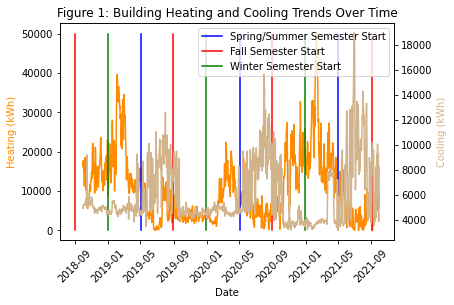

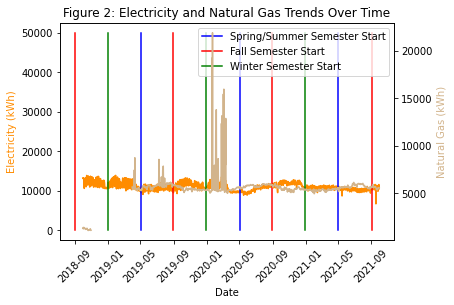

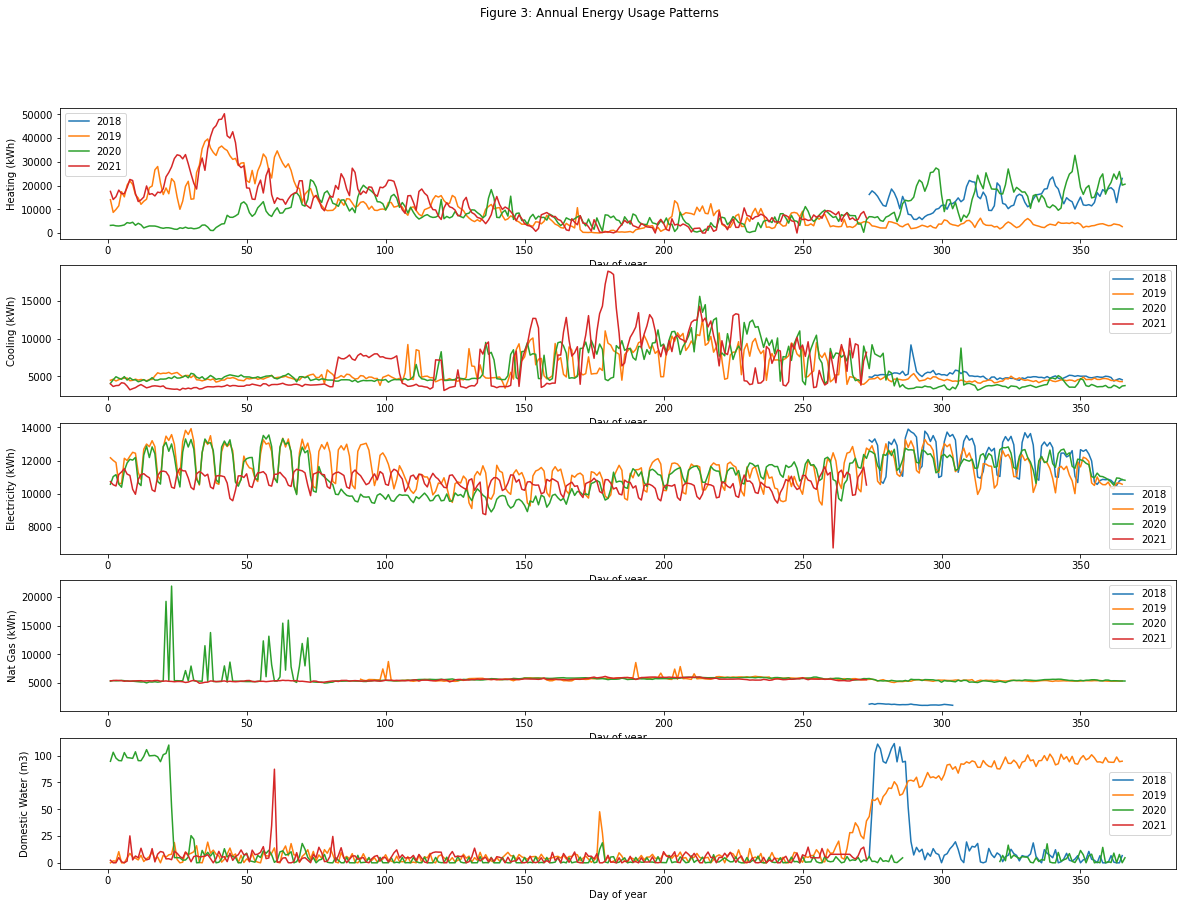

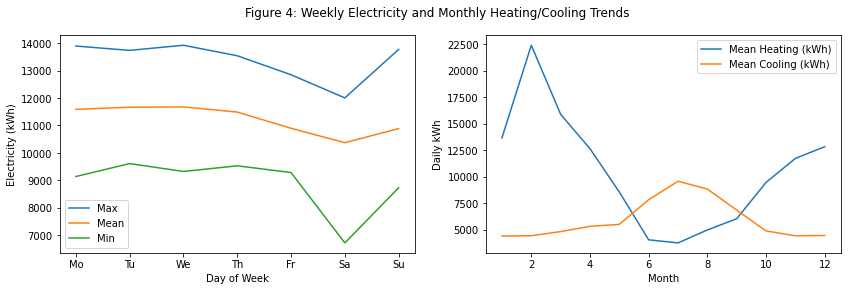

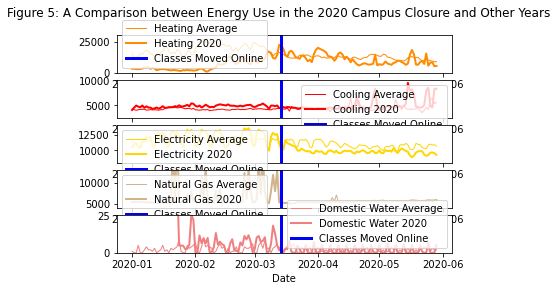

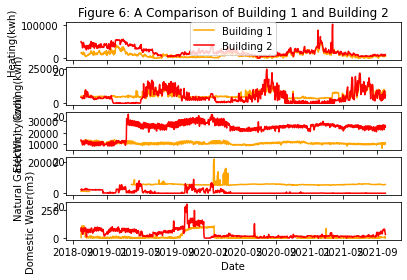

In [1]:
# Code Here

import pandas
import matplotlib.pyplot as plt
import numpy as np

def heat_cooling_combined(data):

    #Gives the x coordinates for the start of each semester.
    spring_summer_points = [18019, 18385, 18748]
    fall_points = [17775, 18138, 18505, 18872]
    winter_points = [17897, 18260, 18626]

    #Sets up a graph, creates a subplot to plot multiple y-axis scales on the same graph
    fig = plt.figure()
    ax1 = fig.add_subplot(111)


    ax1.plot(data['Date'], data['Heating (kWh)'], color='darkorange')

    #Plots a vertical line for the start of each semester
    ax1.plot([spring_summer_points[0],spring_summer_points[0]], [0,50000], label = 'Spring/Summer Semester Start', color='blue')
    ax1.plot([spring_summer_points[1],spring_summer_points[1]], [0,50000], color='blue')
    ax1.plot([spring_summer_points[2],spring_summer_points[2]], [0,50000], color='blue')
    ax1.plot([fall_points[0],fall_points[0]], [0,50000], label = 'Fall Semester Start', color='red')
    ax1.plot([fall_points[1],fall_points[1]], [0,50000], color='red')
    ax1.plot([fall_points[2],fall_points[2]], [0,50000], color='red')
    ax1.plot([fall_points[3],fall_points[3]], [0,50000], color='red')
    ax1.plot([winter_points[0],winter_points[0]], [0,50000], label = 'Winter Semester Start', color='green')
    ax1.plot([winter_points[1],winter_points[1]], [0,50000], color='green')
    ax1.plot([winter_points[2],winter_points[2]], [0,50000], color='green')

    #Organizes the axes
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Heating (kWh)', color='darkorange')
    plt.xticks(rotation = 45)

    #Sets up a second set of data that has it's own independent scale
    ax2 = ax1.twinx()
    ax2.plot(data['Date'], data['Cooling (kWh)'], color='tan')
    ax2.set_ylabel('Cooling (kWh)', color='tan')

    #Title and legend
    plt.title('Figure 1: Building Heating and Cooling Trends Over Time')
    ax1.legend(loc=1)

    plt.show()
    return

def electricity_gas_combined(data):
    
    #Gives the x coordinates for the start of each semester.
    spring_summer_points = [18019, 18385, 18748]
    fall_points = [17775, 18138, 18505, 18872]
    winter_points = [17897, 18260, 18626]

    #Sets up a graph, creates a subplot to plot multiple y-axis scales on the same graph
    fig = plt.figure()
    ax1 = fig.add_subplot(111)


    ax1.plot(data['Date'], data['Electricity (kWh)'], color='darkorange')

    #Plots a vertical line for the start of each semester
    ax1.plot([spring_summer_points[0],spring_summer_points[0]], [0,50000], label = 'Spring/Summer Semester Start', color='blue')
    ax1.plot([spring_summer_points[1],spring_summer_points[1]], [0,50000], color='blue')
    ax1.plot([spring_summer_points[2],spring_summer_points[2]], [0,50000], color='blue')
    ax1.plot([fall_points[0],fall_points[0]], [0,50000], label = 'Fall Semester Start', color='red')
    ax1.plot([fall_points[1],fall_points[1]], [0,50000], color='red')
    ax1.plot([fall_points[2],fall_points[2]], [0,50000], color='red')
    ax1.plot([fall_points[3],fall_points[3]], [0,50000], color='red')
    ax1.plot([winter_points[0],winter_points[0]], [0,50000], label = 'Winter Semester Start', color='green')
    ax1.plot([winter_points[1],winter_points[1]], [0,50000], color='green')
    ax1.plot([winter_points[2],winter_points[2]], [0,50000], color='green')

    #Organizes the axes
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Electricity (kWh)', color='darkorange')
    plt.xticks(rotation = 45)

    #Sets up a second set of data that has it's own independent scale
    ax2 = ax1.twinx()
    ax2.plot(data['Date'], data['Nat Gas (kWh)'], color='tan')
    ax2.set_ylabel('Natural Gas (kWh)', color='tan')

    #Title and legend
    plt.title('Figure 2: Electricity and Natural Gas Trends Over Time')
    ax1.legend(loc=1)

    plt.show()
    return

def yearly_all_combined(data):
    # helper variables to specify the years of interest and the columns.
    years = [2018, 2019, 2020, 2021]
    cols = ['Heating (kWh)', 'Cooling (kWh)', 'Electricity (kWh)', 'Nat Gas (kWh)', 'Domestic Water (m3)']

    # Create a new figure with the number of subplots equal to the number of cols
    fig, ax = plt.subplots(nrows=len(cols), ncols=1, figsize=[20,14])

    # Loop through the years to plot
    for year in years:
        # Select the data from that year
        dat = data[data['Date'].dt.year == year]
        
        # Loop through the columns and plot the data in the appropriate subplot
        for idx in range(len(cols)):
            ax[idx].plot(dat['Date'].dt.dayofyear, dat[cols[idx]])
            
    # Set the same xlabel for all subplots
    plt.setp(ax, xlabel = 'Day of year')

    # Loop through the subplots and set the appropriate ylabel
    for idx in range(len(cols)):
        plt.setp(ax[idx], ylabel = cols[idx])
        
        # Add a legend to each subplot
        ax[idx].legend(years)
    
    #Creates a title at the top of the page
    plt.suptitle('Figure 3: Annual Energy Usage Patterns')

    # Show the plot
    plt.show()
    return

def months_weeks_all(data):
    # Create a new figure
    fig = plt.figure(figsize=[14,4])

    # Create a new subplot.  '121' means 1 row, 2 columns, 1st subplot
    axes1 = plt.subplot(121)

    # Bin the data by day of the week
    binned_data_by_day_of_week = data.groupby(data['Date'].dt.dayofweek)

    # Plot the min, max and mean of the Electricity data
    binned_data_by_day_of_week ['Electricity (kWh)'].max().plot(ax=axes1)
    binned_data_by_day_of_week ['Electricity (kWh)'].mean().plot(ax=axes1)
    binned_data_by_day_of_week ['Electricity (kWh)'].min().plot(ax=axes1)

    # Create labels
    plt.xlabel('Day of Week')

    # dayofweek by default starts with Monday as index 0.  xticks() allows
    # for custom tick labels
    plt.xticks(range(7),['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su'])
    plt.ylabel('Electricity (kWh)')

    # Add a legend
    plt.legend(['Max', 'Mean', 'Min'])


    # Create a new subplot.  '121' means 1 row, 2 columns, 2nd subplot
    axes2 = plt.subplot(122)

    # Bin the data by month
    binned_data_by_month = data.groupby(data['Date'].dt.month)

    # Plot the average monthly heating and cooling use
    binned_data_by_month ['Heating (kWh)'].mean().plot(ax=axes2)
    binned_data_by_month ['Cooling (kWh)'].mean().plot(ax=axes2)

    # Add labels and a legend
    plt.xlabel('Month')
    plt.legend(['Mean Heating (kWh)', 'Mean Cooling (kWh)'])
    plt.ylabel('Daily kWh')

    #Creates a title centered above and between the two subplots
    plt.suptitle('Figure 4: Weekly Electricity and Monthly Heating/Cooling Trends')

    # Show the plot
    plt.show()
    return

def covid_shutdown(data):

    #Break the data into each year, only 2019, 2020 and 2021 are used as 2018 does not have spring data
    data2019_extended= data[data['Date'].dt.year == 2019]
    data2020_extended= data[data['Date'].dt.year == 2020]
    data2021_extended= data[data['Date'].dt.year == 2021]

    #Keeps only the first 150 days of each year. This is to help focus in on March rather than the whole year
    data2019 = data2019_extended.head(150)
    data2020 = data2020_extended.head(150)
    data2021 = data2021_extended.head(150)

    #Converts to an array for easier data manipulation
    array_2019 = data2019.values
    array_2021 = data2021.values

    list_heat_avg, list_cool_avg, list_electricity_avg, list_gas_avg, list_water_avg = [], [], [], [], []
    row_number = 0

    #Iterates through the first 150 days in a year
    for row in array_2019:
        #Pulls the values for each column in 2019 and 2021
        heating_2019, cooling_2019, electricity_2019, nat_gas_2019, water_2019 = row[1], row[2], row[3], row[4], row[5]
        heating_2021, cooling_2021, electricity_2021, nat_gas_2021, water_2021 = array_2021[row_number][1], array_2021[row_number][2], array_2021[row_number][3], array_2021[row_number][4], array_2021[row_number][5]
        #Averages those values to create an daily average for comparison to 2020
        list_heat_avg.append((heating_2019 + heating_2021)//2)
        list_cool_avg.append((cooling_2019 + cooling_2021)//2)
        list_electricity_avg.append((electricity_2019 + electricity_2021)//2)
        list_gas_avg.append((nat_gas_2019 + nat_gas_2021)//2)
        list_water_avg.append((water_2019 + water_2021)//2)

        row_number =+ 1

    #Pulls just the dates from 2020
    dates = data2020['Date']

    #Creates an empty data frame and then fills it with the 2019/2021 averages 
    averages = pandas.DataFrame()
    averages['Date'] = dates
    averages['Heating'] = list_heat_avg
    averages['Cooling'] = list_cool_avg
    averages['Electricity'] = list_electricity_avg
    averages['Nat Gas'] = list_gas_avg
    averages['Water'] = list_water_avg

    #Sets up 5 graphs aligned vertically
    ax1 = plt.subplot(511)
    ax2 = plt.subplot(512)
    ax3 = plt.subplot(513)
    ax4 = plt.subplot(514)
    ax5 = plt.subplot(515)

    #The x coordinate for the middle of March 2020
    covid_closure = [18335,18335]

    #Plots heating average, heating 2020 and a vertical line for the campus closure
    ax1.plot(averages['Date'], averages['Heating'], color='darkorange', label = 'Heating Average', linewidth = 1)
    ax1.plot(data2020['Date'], data2020['Heating (kWh)'], color='darkorange', linewidth = 2 , label = 'Heating 2020')
    ax1.plot(covid_closure, [0,50000], label = 'Classes Moved Online', color='blue', linewidth = 3)

    #Plots cooling average, cooling 2020 and a vertical line for the campus closure
    ax2.plot(averages['Date'], averages['Cooling'], color='red', label = 'Cooling Average', linewidth = 1)
    ax2.plot(data2020['Date'], data2020['Cooling (kWh)'], color='red', linewidth = 2 , label = 'Cooling 2020')
    ax2.plot(covid_closure, [0,50000], label = 'Classes Moved Online', color='blue', linewidth = 3)

    #Plots electricity average, electricity 2020 and a vertical line for the campus closure
    ax3.plot(averages['Date'], averages['Electricity'], color='gold', label = 'Electricity Average', linewidth = 1)
    ax3.plot(data2020['Date'], data2020['Electricity (kWh)'], color='gold', linewidth = 2 , label = 'Electricity 2020')
    ax3.plot(covid_closure, [0,50000], label = 'Classes Moved Online', color='blue', linewidth = 3)

    #Plots nat gas average, nat gas 2020 and a vertical line for the campus closure
    ax4.plot(averages['Date'], averages['Nat Gas'], color='tan', label = 'Natural Gas Average', linewidth = 1)
    ax4.plot(data2020['Date'], data2020['Nat Gas (kWh)'], color='tan', linewidth = 2 , label = 'Natural Gas 2020')
    ax4.plot(covid_closure, [0,50000], label = 'Classes Moved Online', color='blue', linewidth = 3)

    #Plots water average, water 2020 and a vertical line for the campus closure
    ax5.plot(averages['Date'], averages['Water'], color='lightcoral', label = 'Domestic Water Average', linewidth = 1)
    ax5.plot(data2020['Date'], data2020['Domestic Water (m3)'], color='lightcoral', linewidth = 2 , label = 'Domestic Water 2020')
    ax5.plot(covid_closure, [0,50000], label = 'Classes Moved Online', color='blue', linewidth = 3)

    #Adds a legend to each graph
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax4.legend()
    ax5.legend()

    #Sets the upper and lower y-bounds for each graph to increase the readability
    ax1.set_ylim([0,30000])
    ax2.set_ylim([2500,10000])
    ax3.set_ylim([8000,14000])
    ax4.set_ylim([4000,13000])
    ax5.set_ylim([0,25])

    #Title and x-label
    plt.suptitle('Figure 5: A Comparison between Energy Use in the 2020 Campus Closure and Other Years')
    ax5.set_xlabel('Date')

    plt.show()
    return

def comparing_buildings(data1, data2):
    
    #Sets up 5 vertically aligned graphs
    fig = plt.figure()
    ax1 = fig.add_subplot(511)
    ax2 = fig.add_subplot(512)
    ax3 = fig.add_subplot(513)
    ax4 = fig.add_subplot(514)
    ax5 = fig.add_subplot(515)

    #Plots buildling 1 and buildling 2 stats for each category into a differnt graph
    ax1.plot(data1['Date'], data1['Heating (kWh)'], color='orange', label = 'Building 1')
    ax1.plot(data1['Date'], data2['Heating (kWh)'], color='red', label = 'Building 2')
    ax2.plot(data1['Date'], data1['Cooling (kWh)'], color='orange')
    ax2.plot(data1['Date'], data2['Cooling (kWh)'], color='red')
    ax3.plot(data1['Date'], data1['Electricity (kWh)'], color='orange')
    ax3.plot(data1['Date'], data2['Electricity (kWh)'], color='red')
    ax4.plot(data1['Date'], data1['Nat Gas (kWh)'], color='orange')
    ax4.plot(data1['Date'], data2['Nat Gas (kWh)'], color='red')
    ax5.plot(data1['Date'], data1['Domestic Water (m3)'], color='orange')
    ax5.plot(data1['Date'], data2['Domestic Water (m3)'], color='red')
    
    #Adds y-labels
    ax1.set_ylabel('Heating(kwh)')
    ax2.set_ylabel('Cooling(kwh)')
    ax3.set_ylabel('Electricity(kwh)')
    ax4.set_ylabel('Natural Gas(kWh)')
    ax5.set_ylabel('Domestic Water(m3)')

    #Adds a legend to only one graph as it applies to all
    ax1.legend()

    #Title and x-label
    ax5.set_xlabel('Date')
    ax1.set_title('Figure 6: A Comparison of Building 1 and Building 2')
    
    plt.show()
    return

#Imports buildling 1
data1 = pandas.read_csv('building1.csv', sep=',', header=0)
data1.head()
data1['Date'] = pandas.to_datetime(data1['Date'])

#Imports building 2
data2 = pandas.read_csv('building2.csv', sep=',', header=0)
data2.head()
data2['Date'] = pandas.to_datetime(data2['Date'])

heat_cooling_combined(data1) #For Q1
electricity_gas_combined(data1) #For Q1
yearly_all_combined(data1) #For Q1
months_weeks_all(data1) #For Q1
covid_shutdown(data1) #For Q2
comparing_buildings(data1, data2) #For Q3